# Word2vec 

similarity of words 
- read glove word2vec (Global Vectors for Word Representation)
- visualize similarity of paraphrases
- regression of similarity values on HTra values

In [2]:
import gensim 
from gensim.models import Word2Vec 
from gensim.models import KeyedVectors

# load the Stanford GloVe model (300 nodes per vector)
filename = '/data/critt/shared/resources/w2v/glove/glove.6B.300d.word2vec.txt'
modelSF = KeyedVectors.load_word2vec_format(filename, binary=False)

KeyboardInterrupt: 

In [ ]:

# Print results 
print("Cosine similarity between 'dog' " + "and 'cat' - CBOW : ", 
    modelSF.similarity('dog', 'cat')) 
      
print("Cosine similarity between 'dog' " + "and 'machines' - CBOW : ", 
      modelSF.similarity('dog', 'machines')) 



In [3]:
modelSF.most_similar('woman', topn=10)


[('girl', 0.7296419143676758),
 ('man', 0.6998662948608398),
 ('mother', 0.689943790435791),
 ('she', 0.6433227062225342),
 ('her', 0.6327142715454102),
 ('female', 0.6251603960990906),
 ('herself', 0.6215280890464783),
 ('person', 0.6170897483825684),
 ('women', 0.6047609448432922),
 ('wife', 0.5986992716789246)]

In [4]:
# calculate: (king - man) + woman = ?
result = modelSF.most_similar(positive=['man', 'queen'], negative=['woman'], topn=3)
print(result)

[('king', 0.6552621126174927), ('ii', 0.5050469040870667), ('prince', 0.4914788007736206)]


In [5]:
words = ["house",  "building", "father", "brother", "purse", "wallet"]

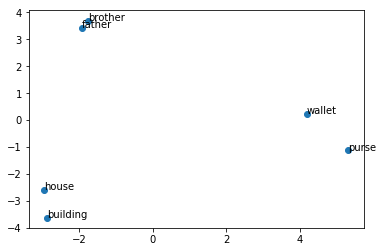

In [9]:
# visualize proximity of words and paraphrases
from sklearn.decomposition import PCA
from matplotlib import pyplot


# extract glove vectors for words
X = modelSF[words]

# fit a 2d PCA model to the vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)
#print(result)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    #print(i, word)
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [1]:
# Task:
# compare similarities of th five 
# generate models with lemmatized texts

from pathlib import Path
import os.path
import nltk

# import nltk books
#from nltk.book import *

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tag import pos_tag

def preprocessSent(sent, tag = True):
    sent = nltk.word_tokenize(sent)
    if(tag == True):  sent = nltk.pos_tag(sent)
    return sent

def preprocessText(text, tag = True):
# Segment text into sentences
    sent = sent_tokenize(text)
# Tokenize each sentences
    sent = [nltk.word_tokenize(s) for s in sent]
# Part-of-speech tagging each sentences
    if(tag == True) : sent = [nltk.pos_tag(s) for s in sent]
    return sent

# Read n files from directory and preprocess
# D[doc][sent][word]

def ReadSourceTok(dic, n=100,  tag = False) :
    D = {}
    i = 0
    for f in sorted(Path(dic).iterdir()):
        print(f.resolve())
        if (i == n): break
        i += 1
        with f.open('r', encoding='utf-8') as fhin:
            data = fhin.read()
        b = os.path.basename(f)
        D.setdefault(b, [])
        D[b].append(preprocessSent(data, tag = tag))
    return D


In [2]:

D = ReadSourceTok("/users/kent/slee122/code/data/text_file/", n=4,  tag = False)
D1 = []
for i in D.keys():
    D1.append(D[i][0])
#print(D1[3])

/users/kent/slee122/code/data/text_file/0_10.txt
/users/kent/slee122/code/data/text_file/10000_7.txt
/users/kent/slee122/code/data/text_file/10001_9.txt
/users/kent/slee122/code/data/text_file/10002_8.txt


In [3]:
# visualize proximity of words and paraphrases
import gensim 
from gensim.models import Word2Vec 
from gensim.models import KeyedVectors

In [9]:
# Create CBOW model 

model1 = gensim.models.Word2Vec(D1, min_count = 1, size = 100, window = 5) 

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


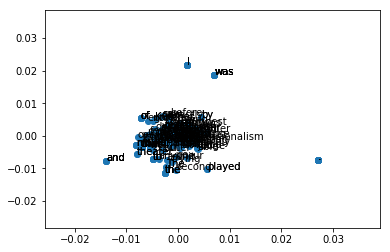

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


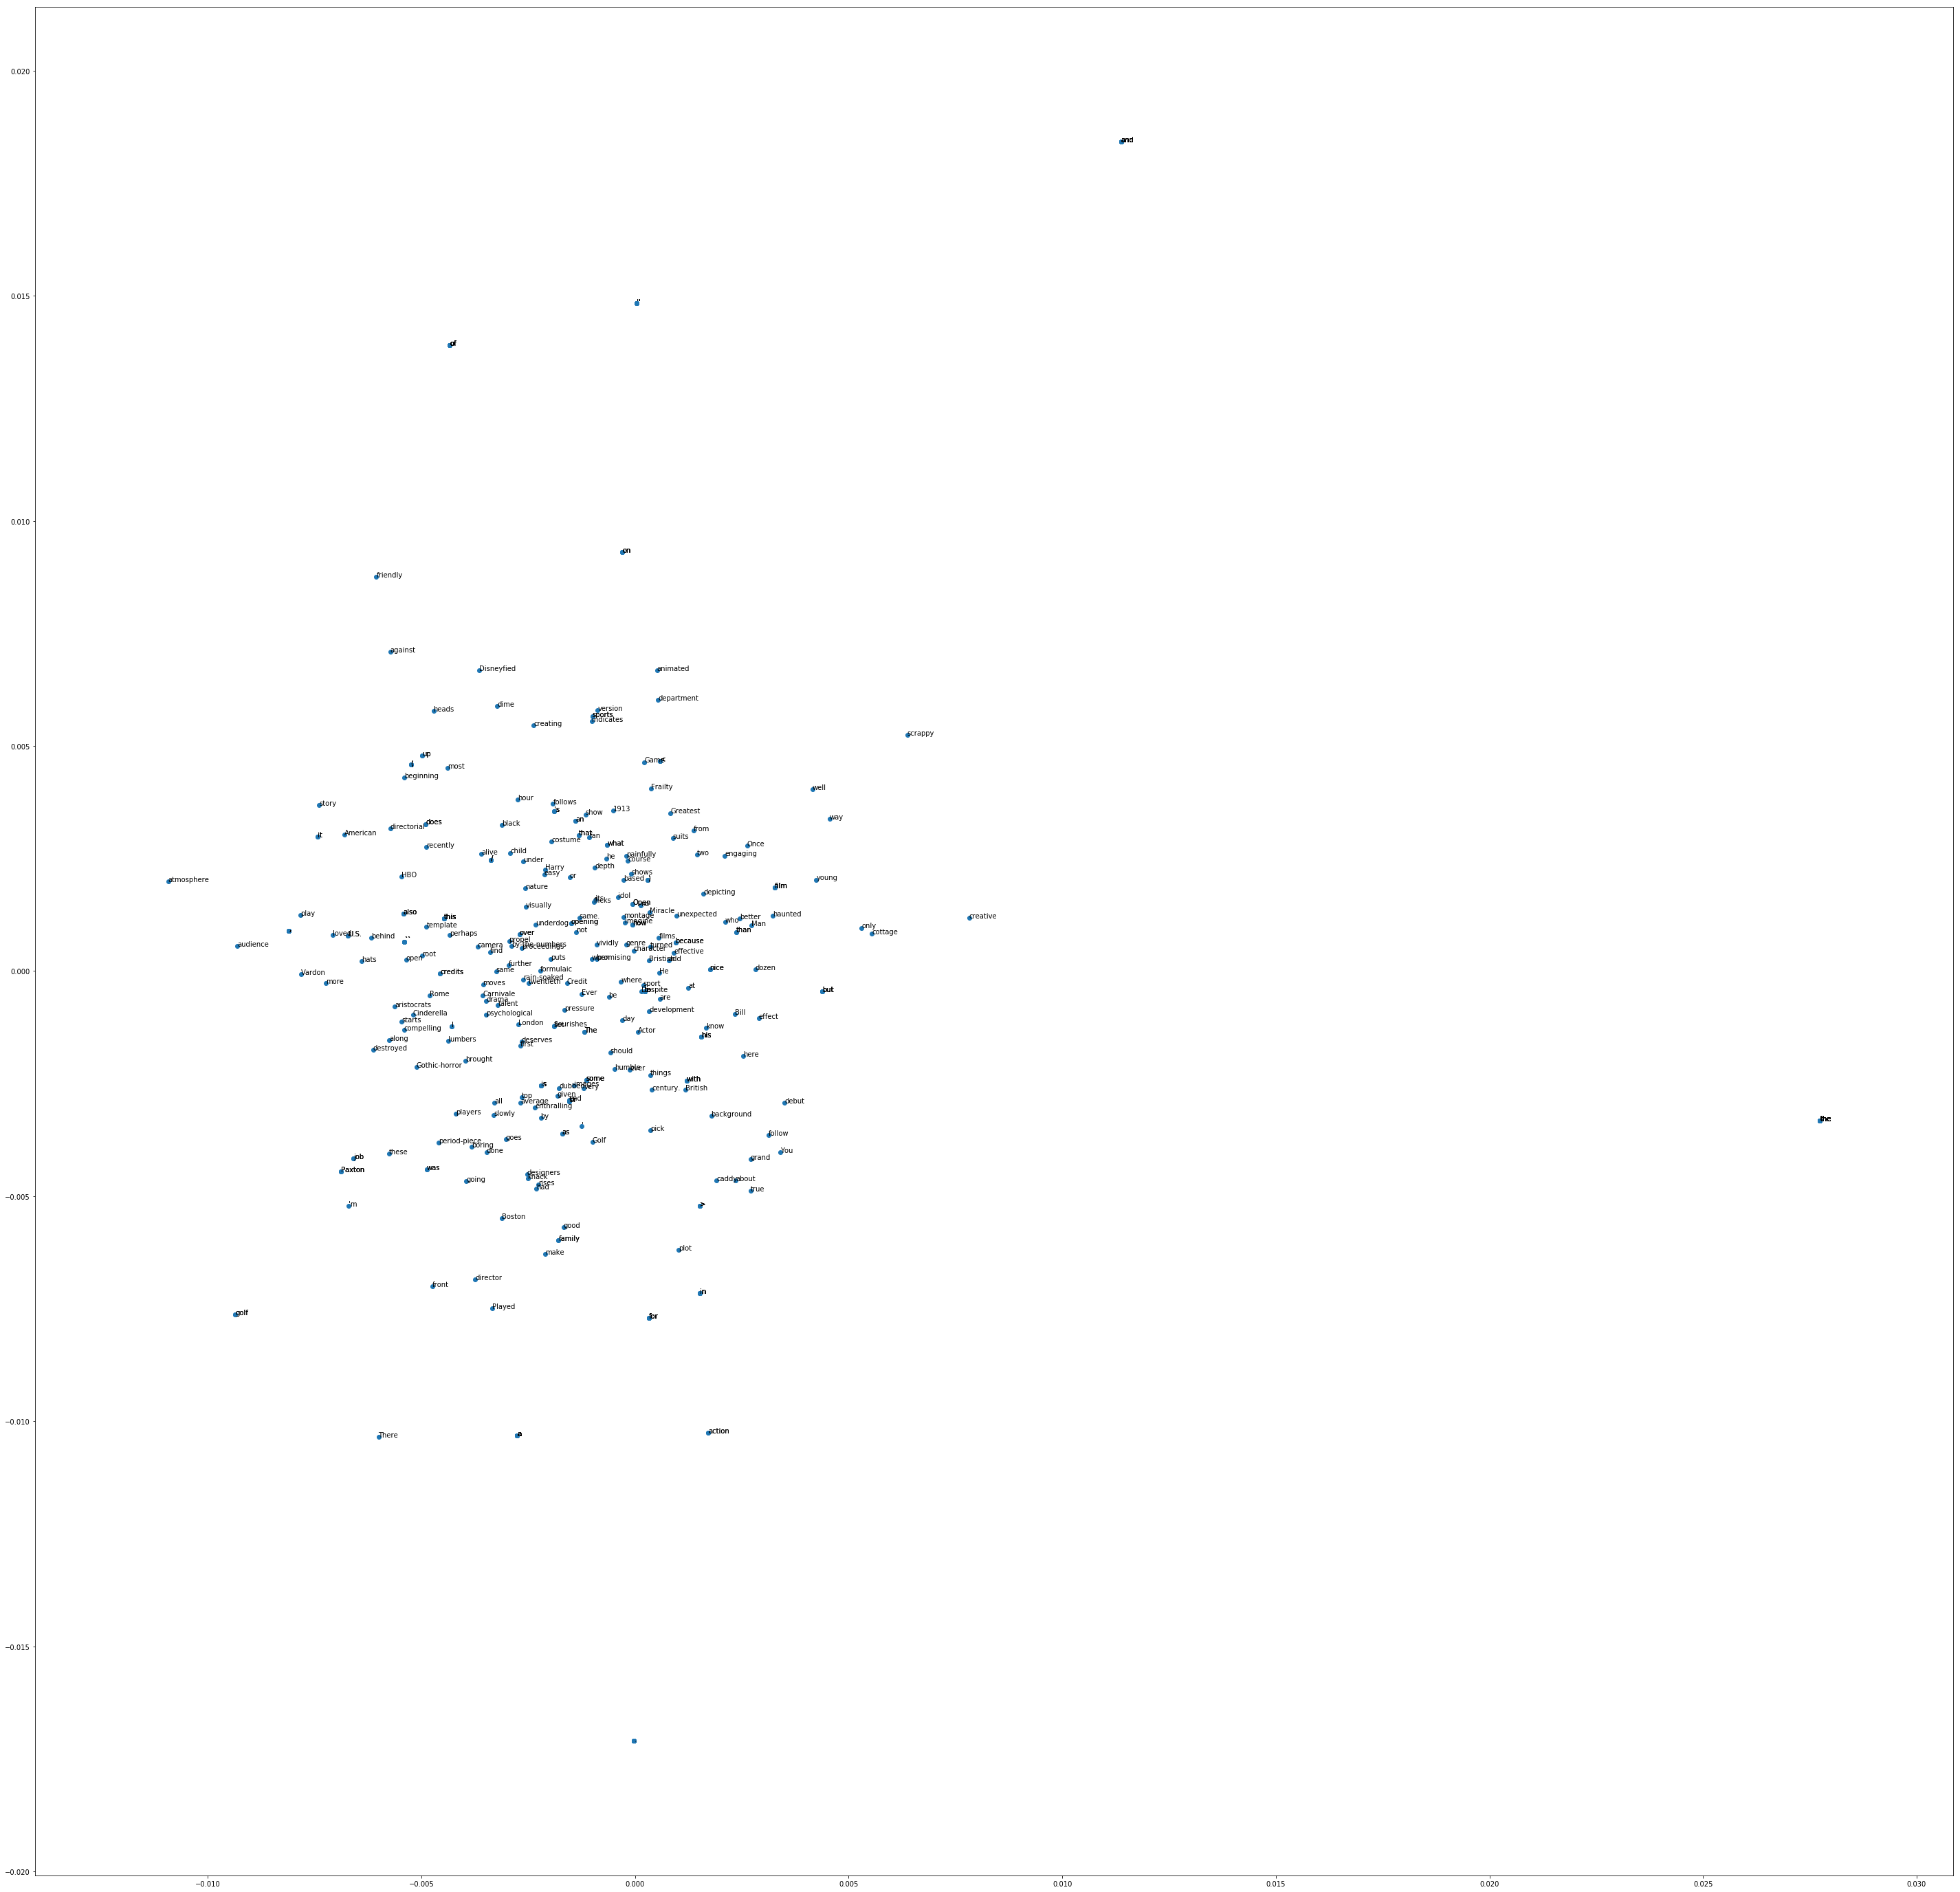

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


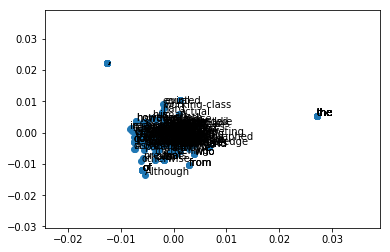

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:44: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


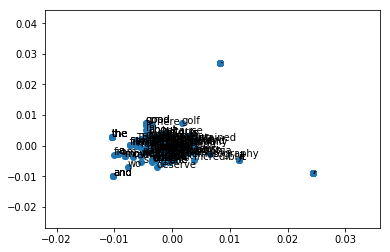

In [28]:

from sklearn.decomposition import PCA
from matplotlib import pyplot


# extract glove vectors for words
X = model1[D1[0]]
    # fit a 2d PCA model to the vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)
#print(result)
    # create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(D1[0]):
    #print(i, word)
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

X = model1[D1[1]]
    # fit a 2d PCA model to the vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)
#print(result)
    # create a scatter plot of the projection
pyplot.figure(figsize=(50,50))
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(D1[1]):
    #print(i, word)
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

X = model1[D1[2]]
    # fit a 2d PCA model to the vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)
#print(result)
    # create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(D1[2]):
    #print(i, word)
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

X = model1[D1[3]]
    # fit a 2d PCA model to the vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)
#print(result)
    # create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(D1[3]):
    #print(i, word)
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()